In [65]:
import pandas as pd
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [134]:
data = {"data": [ 2009, 1, 2, 3, 4, 5, 100, 6, 101]}
df = pd.DataFrame(data)

features = ["data"]

   data  order   reach  labels
0  2009      0     inf       0
1     1      5     3.0       0
2     2      2     3.0       0
3     3      1     3.0       0
4     4      3     2.0       0
5     5      4  2004.0       0
6   100      7    94.0       0
7     6      6     2.0       0
8   101      8    95.0       0


Text(0.5, 1.0, 'Reachability Plot')

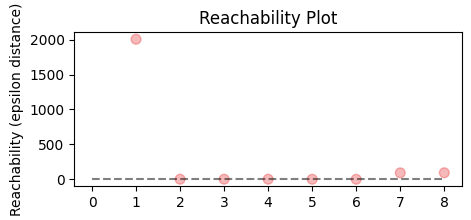

In [135]:
clust= OPTICS().fit(df[features])

space = np.arange(len(df))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

df["order"] = clust.ordering_
df["reach"] = clust.reachability_
df["labels"] = clust.labels_
print(df)

norm = colors.Normalize(vmin=0, vmax=max(labels))

plt.figure(figsize=(5,2))
plt.scatter(space[labels!=-1], reachability[labels!=-1], c=labels[labels!=-1], norm=norm, s=50, cmap="Set1", alpha=.3)
plt.scatter(space[labels==-1], reachability[labels==-1], c="black", s=50, alpha=.3, marker=".")

plt.plot(space, np.full_like(space, 10, dtype=float), "k--", alpha=0.5)

plt.ylabel("Reachability (epsilon distance)")
plt.title("Reachability Plot")

In [136]:
labels_limit = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=50
)

In [137]:
df["labels_limit"] = labels_limit

In [138]:
df

,data,order,reach,labels,labels_limit
0,2009,0,inf,0,-1
1,1,5,3.0,0,0
2,2,2,3.0,0,0
3,3,1,3.0,0,0
4,4,3,2.0,0,0
5,5,4,2004.0,0,0
6,100,7,94.0,0,-1
7,6,6,2.0,0,0
8,101,8,95.0,0,-1
